In [1]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


#Load the data as a data frame
df = pd.read_csv('data\\1000.csv')

In [2]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [4]:
df.drop(['Order ID', 'Order Date', 'Order Priority'], axis=1, inplace=True)
#df.drop(['Unnamed: 0', 'vin', 'lot', 'country', 'condition'], axis=1, inplace=True)

In [5]:
#move null values 
df.dropna()

,Region,Country,Item Type,Sales Channel,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,12/08/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,12/09/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,9/07/2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


KeyError: 'price'

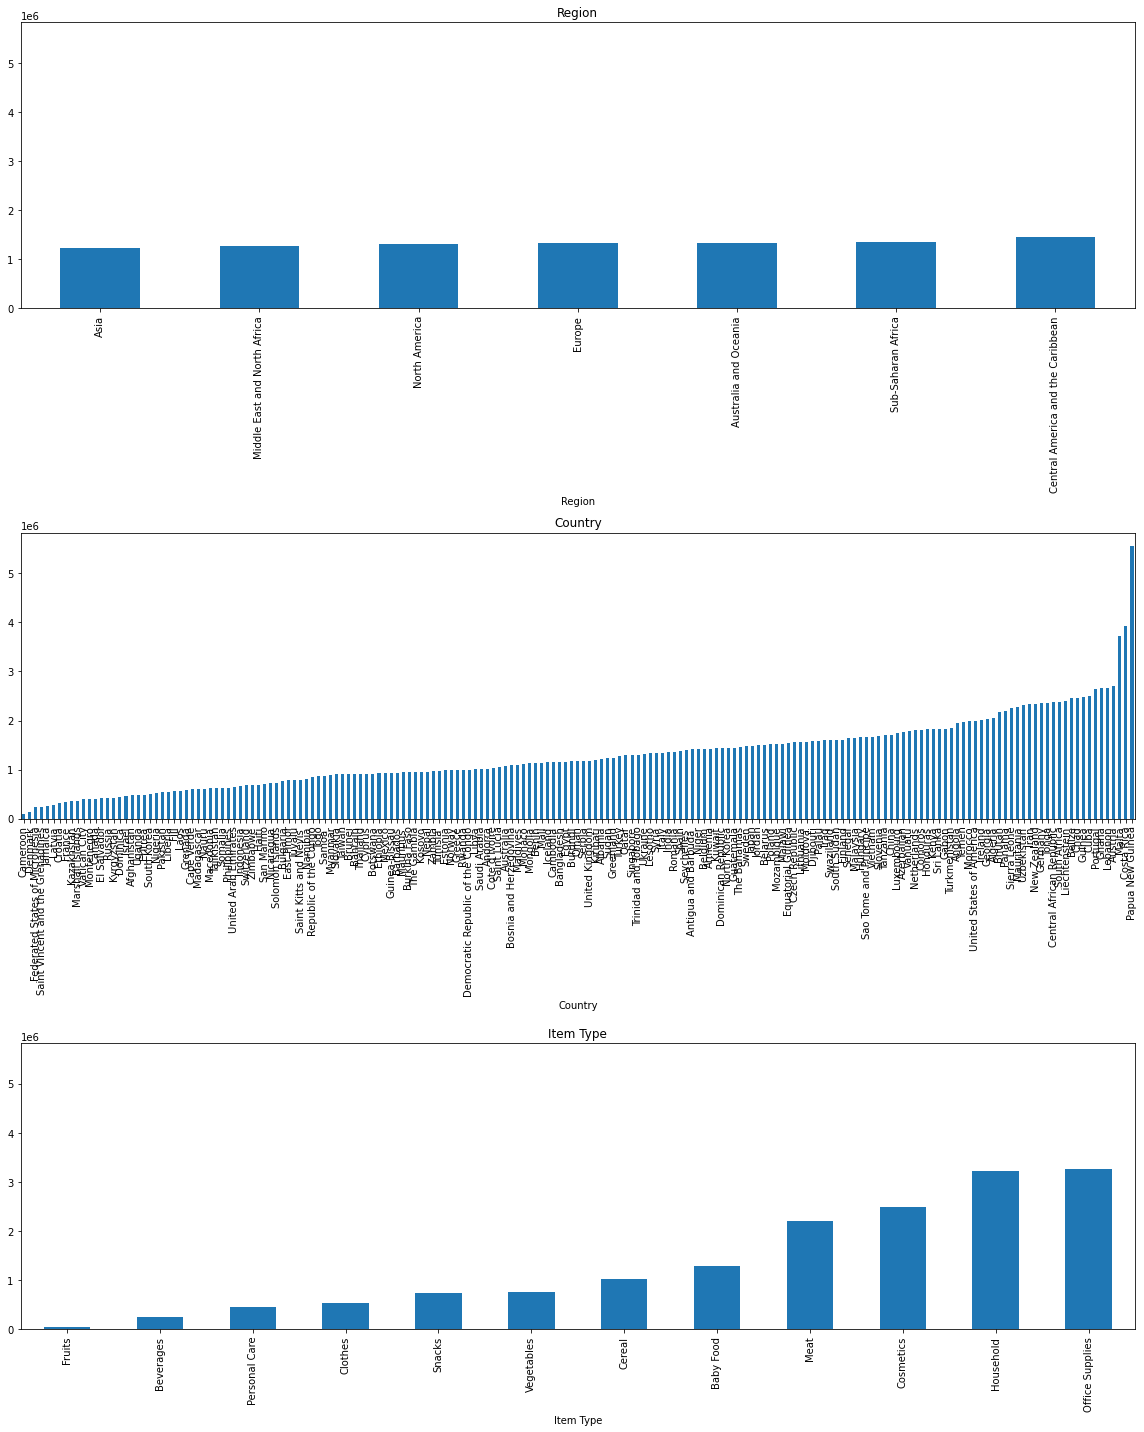

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,20), sharey=True)

continuous = ['Units Sold', 'Unit Price', 'Total Revenue', 'Total Cost', 'Total Profit']
categoricals = ['Region', 'Country', 'Item Type','Sales Channel']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['Total Revenue']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

df_cont = df[continuous]

In [7]:
df.corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.004212,0.002574,0.527945,0.479713,0.591957
Unit Price,0.004212,1.000000,0.986735,0.730752,0.745538,0.572235
Unit Cost,0.002574,0.986735,1.000000,0.717999,0.753678,0.498156
Total Revenue,0.527945,0.730752,0.717999,1.000000,0.987779,0.881429
Total Cost,0.479713,0.745538,0.753678,0.987779,1.000000,0.797041
Total Profit,0.591957,0.572235,0.498156,0.881429,0.797041,1.000000


KeyError: 'price'

In [8]:
# Create dummy variables for your four categorical features
dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)
df_preprocessed = df.drop(categoricals, axis=1)
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
df_preprocessed.head()

,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,...,Item Type_Clothes,Item Type_Cosmetics,Item Type_Fruits,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Online
0,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,12/08/2011,3018,154.06,90.93,464953.08,274426.74,190526.34,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,12/09/2016,1517,255.28,159.42,387259.76,241840.14,145419.62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# log features declared with lamda values to convert int to floats 
log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names

In [10]:
# normalize continued features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [11]:
#creating dummy data categorical data
pd.get_dummies(df)

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,...,Ship Date_9/25/2013,Ship Date_9/25/2014,Ship Date_9/26/2015,Ship Date_9/26/2016,Ship Date_9/27/2012,Ship Date_9/28/2013,Ship Date_9/29/2012,Ship Date_9/29/2013,Ship Date_9/29/2014,Ship Date_9/30/2015
0,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3018,154.06,90.93,464953.08,274426.74,190526.34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1517,255.28,159.42,387259.76,241840.14,145419.62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3322,205.70,117.11,683335.40,389039.42,294295.98,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9845,9.33,6.92,91853.85,68127.40,23726.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6524,152.58,97.44,995431.92,635698.56,359733.36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,288,255.28,159.42,73520.64,45912.96,27607.68,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
997,9556,154.06,90.93,1472197.36,868927.08,603270.28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,9801,668.27,502.54,6549714.27,4925394.54,1624319.73,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#data_cont = data[continuous]
df_ohe = pd.get_dummies(df[categoricals], drop_first=True)
#pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [13]:
#combining two variables
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
preprocessed.head()

,Units Sold_log,Unit Price_log,Total Revenue_log,Total Cost_log,Total Profit_log,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,Region_Middle East and North Africa,Region_North America,...,Item Type_Clothes,Item Type_Cosmetics,Item Type_Fruits,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Online
0,0.833773,0.865609,1.202860,1.127043,1.366912,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.216631,-0.059321,-0.187260,-0.236017,-0.020767,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,-0.918732,0.388508,-0.309920,-0.318362,-0.204345,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.118672,0.197020,0.071054,-0.008671,0.274676,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.990217,-2.545879,-1.275217,-1.143655,-1.436299,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
# one hot encode (ohe)categoricals x & y variables

X = preprocessed.drop('Item Type', axis=1)
y = preprocessed['Item Type']

KeyError: "['Item Type'] not found in axis"

In [ ]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
df[['Total Profit']].nunique()

In [ ]:
#df.nlargest(n=10, columns=['Country'])

In [ ]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

In [ ]:
#Look at correlations between variables to identify best predictor for response (score)
df.corr()

In [ ]:
#Let's plot cost vs. score
plt.scatter(df['Item Type'], df['Total Profit']);

#Strong linear association between cost and score, maybe some concern with model
# after a cost of 125 or so!


In [ ]:
#Assign x, y then do training testing split
x=df['Cost']
y=df['Score']

#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [ ]:
#statsmodel approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()


In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

In [ ]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()








In [ ]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

In [ ]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance




In [ ]:

#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

In [ ]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()


In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

In [ ]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination